In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Importing required functions from sklearn

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [5]:
# Importing the data 

In [6]:
credit = pd.read_csv("D:\Data science\Assignments docs\Logistic Regression\credit_card.csv")
credit.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [7]:
credit.shape

(1319, 13)

In [8]:
# Dropping the first unwanted column

In [9]:
credit.drop(["Unnamed: 0"],inplace=True,axis=1)
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [10]:
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [11]:
credit.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [12]:
# summarize the number of unique values in each column

In [13]:
print(credit.nunique())

card              2
reports          13
age             418
income          431
share          1162
expenditure     981
owner             2
selfemp           2
dependents        7
months          193
majorcards        2
active           35
dtype: int64


In [14]:
# Categorizing the dependent variable "card" values into 0s and 1s

In [15]:
credit.card = pd.factorize(credit.card)[0]           # 0 is yes and 1 is no
credit.card

0       0
1       0
2       0
3       0
4       0
       ..
1314    0
1315    1
1316    0
1317    0
1318    0
Name: card, Length: 1319, dtype: int64

# Data Exploration

In [16]:
credit["card"].value_counts()

0    1023
1     296
Name: card, dtype: int64

In [17]:
# Countplots of different variables

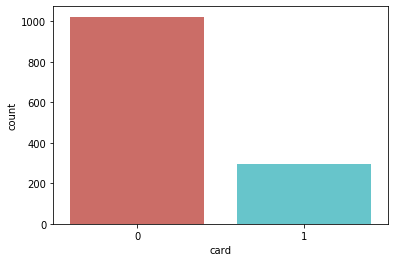

In [18]:
sb.countplot("card", data=credit, palette="hls")

In [19]:
Acceptance_percentage = (len(credit[credit["card"]==0])/len(credit))*100      

In [20]:
print("Percentage of accepted cards:", Acceptance_percentage)

Percentage of accepted cards: 77.5587566338135


In [21]:
# Card acceptance percentage is 78% compared to 22% for non_acceptance

In [22]:
credit.groupby("card").mean()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
card,,,,,,,,,
0,0.129032,33.216031,3.451273,0.088482,238.602421,0.969697,55.258065,0.839687,7.269795
1,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054


In [23]:
# Observations
# The cards which are not accepted have higher number of derogatory reports.
# The mean age for both accepted clients and non-accepted clients are almost same.
# Income of card accepted customers is higher than the not accepted ones.
# Share of the not accepted customers is very low compared to accepted ones.

In [24]:
credit.groupby("owner").mean()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active
owner,,,,,,,,,,
no,0.279133,0.520325,29.904810,2.877435,0.070056,162.559447,0.651762,41.239837,0.795393,5.459350
yes,0.154905,0.375215,37.415376,3.985171,0.067051,213.634086,1.428571,73.086059,0.845095,8.950086


In [25]:
credit.groupby("selfemp").mean()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active
selfemp,,,,,,,,,,
no,0.218241,0.449511,32.935939,3.313615,0.070765,187.696948,0.979642,54.078990,0.816775,6.946254
yes,0.307692,0.549451,36.953296,4.063865,0.041306,149.433234,1.186813,71.307692,0.824176,7.681319


# Visualizations

In [26]:
# Countplots of different variables

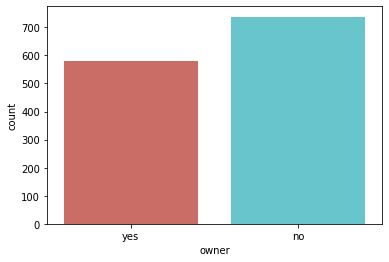

In [27]:
sb.countplot("owner", data=credit, palette='hls')

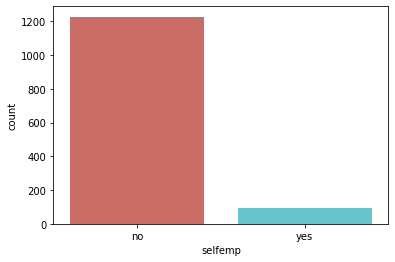

In [28]:
sb.countplot("selfemp", data=credit, palette='hls')

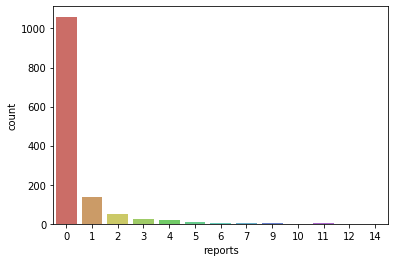

In [29]:
sb.countplot("reports", data=credit,palette='hls')

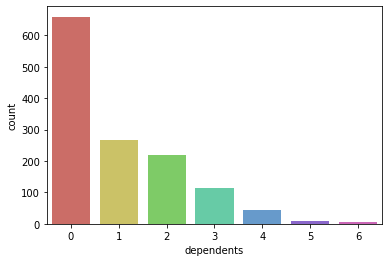

In [30]:
sb.countplot("dependents", data=credit,palette='hls')

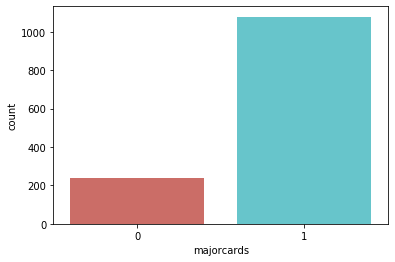

In [31]:
sb.countplot("majorcards", data=credit,palette='hls')

In [32]:
# Cross-tabulation of independent varibales with respect to dependent variable

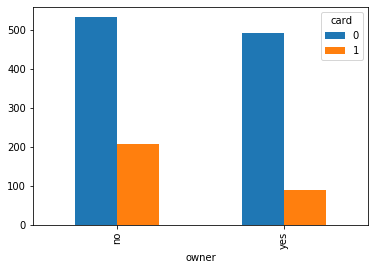

In [33]:
pd.crosstab(credit.owner, credit.card).plot(kind="bar")

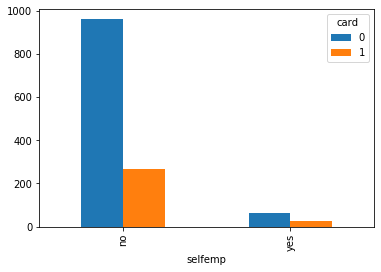

In [34]:
pd.crosstab(credit.selfemp,credit.card).plot(kind="bar")

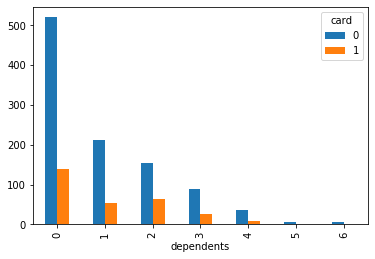

In [35]:
pd.crosstab(credit.dependents,credit.card).plot(kind="bar")

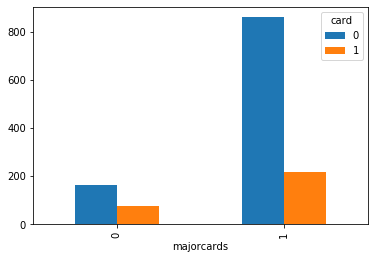

In [36]:
pd.crosstab(credit.majorcards,credit.card).plot(kind="bar")

In [37]:
# Histograms of "Age"

Text(0, 0.5, 'Frequency')

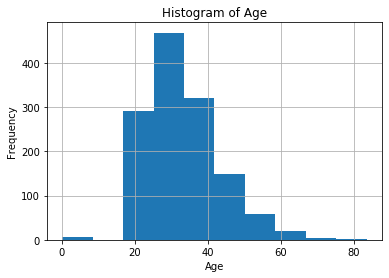

In [38]:
credit.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [39]:
# Boxplots of one variable with respect to other

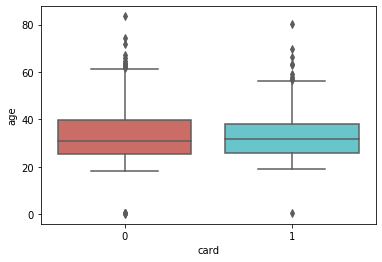

In [40]:
sb.boxplot("card","age", data=credit, palette='hls')

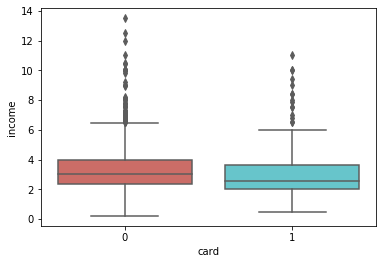

In [41]:
sb.boxplot("card", "income", data=credit, palette='hls')

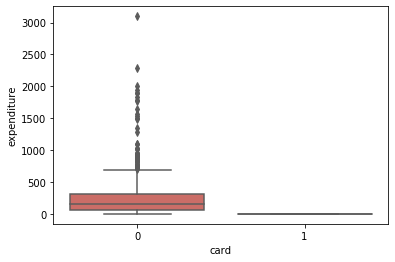

In [42]:
sb.boxplot("card","expenditure", data=credit, palette='hls')

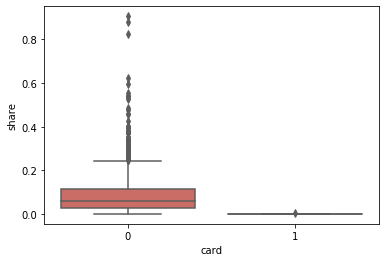

In [43]:
sb.boxplot("card", "share",data=credit,palette='hls')

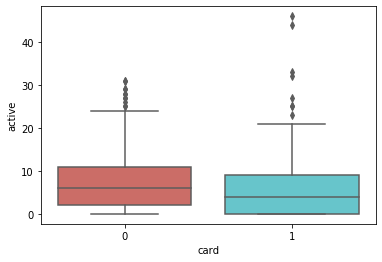

In [44]:
sb.boxplot("card", "active",data=credit,palette='hls')

In [45]:
# All the above plots helps to identify the important variables in the dataset for the credit card acceptance

In [46]:
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [47]:
# The columns which are less useful and carries less information are removed like "dependents" and "month"

In [48]:
credit_final = credit.iloc[:, [0,1,2,3,4,5,6,7,10,11]]
credit_final

,card,reports,age,income,share,expenditure,owner,selfemp,majorcards,active
0,0,0,37.66667,4.5200,0.033270,124.983300,yes,no,1,12
1,0,0,33.25000,2.4200,0.005217,9.854167,no,no,1,13
2,0,0,33.66667,4.5000,0.004156,15.000000,yes,no,1,5
3,0,0,30.50000,2.5400,0.065214,137.869200,no,no,1,7
4,0,0,32.16667,9.7867,0.067051,546.503300,yes,no,1,5
...,...,...,...,...,...,...,...,...,...,...
1314,0,0,33.58333,4.5660,0.002146,7.333333,yes,no,1,19
1315,1,5,23.91667,3.1920,0.000376,0.000000,no,no,1,5
1316,0,0,40.58333,4.6000,0.026513,101.298300,yes,no,1,2
1317,0,0,32.83333,3.7000,0.008999,26.996670,no,yes,1,7


In [49]:
# Creating the dummy variables for categories

In [50]:
credit_final.owner =pd.factorize(credit_final.owner)[0]

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
credit_final.selfemp =pd.factorize(credit_final.selfemp)[0]

In [52]:
# Dataframe after creating the dummy variables

In [53]:
credit_final.head()

,card,reports,age,income,share,expenditure,owner,selfemp,majorcards,active
0,0,0,37.66667,4.5200,0.033270,124.983300,0,0,1,12
1,0,0,33.25000,2.4200,0.005217,9.854167,1,0,1,13
2,0,0,33.66667,4.5000,0.004156,15.000000,0,0,1,5
3,0,0,30.50000,2.5400,0.065214,137.869200,1,0,1,7
4,0,0,32.16667,9.7867,0.067051,546.503300,0,0,1,5


In [54]:
credit.isnull().sum()              # To get the count of null values in the data 

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [55]:
# No NA values in the dataset

In [56]:
# Separate majority and minority classes

In [57]:
credit_majority = credit_final[credit_final.card==0]
credit_minority = credit_final[credit_final.card==1]

In [58]:
credit_minority.shape

(296, 10)

In [59]:
credit_majority.shape

(1023, 10)

In [60]:
# Since the distribution of positive and negative classes is not equal. Hence minority class i.e. not accepted cards data has to upsampled.

In [61]:
# Upsample minority class

In [62]:
from sklearn.utils import resample

In [63]:
minority_upsampled = resample(credit_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1023,    # to match majority class
                                 random_state=1)    # reproducible results

In [64]:
# Combine majority class with upsampled minority class

In [65]:
credit_upsampled = pd.concat([credit_majority, minority_upsampled])
credit_upsampled

,card,reports,age,income,share,expenditure,owner,selfemp,majorcards,active
0,0,0,37.66667,4.5200,0.033270,124.983300,0,0,1,12
1,0,0,33.25000,2.4200,0.005217,9.854167,1,0,1,13
2,0,0,33.66667,4.5000,0.004156,15.000000,0,0,1,5
3,0,0,30.50000,2.5400,0.065214,137.869200,1,0,1,7
4,0,0,32.16667,9.7867,0.067051,546.503300,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...
1103,1,2,25.91667,2.0700,0.000580,0.000000,1,0,0,7
328,1,3,44.58333,2.5000,0.000480,0.000000,0,0,1,18
841,1,1,29.00000,2.7000,0.000444,0.000000,1,0,0,1
283,1,4,25.83333,1.6500,0.000727,0.000000,1,0,1,5


In [66]:
# Display new class counts
credit_upsampled.card.value_counts()

1    1023
0    1023
Name: card, dtype: int64

In [67]:
# Splitting the data based on independent and dependent variables

In [68]:
from sklearn import preprocessing

In [69]:
X = credit_upsampled.loc[:, credit_upsampled.columns != 'card']
Y = credit_upsampled.loc[:, credit_upsampled.columns == 'card']

In [70]:
# Scaling or standardizing the data

In [71]:
x_scaled = preprocessing.scale(X)
x_scaled

array([[-4.63466393e-01,  4.42316357e-01,  7.37143384e-01, ...,
        -2.74124987e-01,  5.23423923e-01,  8.60170296e-01],
       [-4.63466393e-01,  1.54460357e-03, -5.06609016e-01, ...,
        -2.74124987e-01,  5.23423923e-01,  1.01755792e+00],
       [-4.63466393e-01,  4.31271457e-02,  7.25298123e-01, ...,
        -2.74124987e-01,  5.23423923e-01, -2.41543081e-01],
       ...,
       [ 8.75227065e-02, -4.22593933e-01, -3.40775363e-01, ...,
        -2.74124987e-01, -1.91049732e+00, -8.71093582e-01],
       [ 1.74049001e+00, -7.38619058e-01, -9.62651563e-01, ...,
        -2.74124987e-01,  5.23423923e-01, -2.41543081e-01],
       [-4.63466393e-01, -1.56467460e-01, -1.63096449e-01, ...,
        -2.74124987e-01, -1.91049732e+00, -1.02848121e+00]])

In [72]:
# Splitting the data for training and testing

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,Y, test_size= 0.3, random_state=0)

In [74]:
x_train.shape

(1432, 9)

In [75]:
x_test.shape

(614, 9)

In [76]:
# Building the LogisticRegression  model

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
classifier = LogisticRegression()

In [79]:
classifier.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [80]:
classifier.coef_                  # coefficients of features 

array([[ 2.73812834e+00,  5.77524206e-02, -1.86804363e-01,
        -6.92858392e+00, -6.19401192e+00,  8.65691536e-02,
        -7.93983826e-04, -1.41450998e-01, -7.18539673e-01]])

In [81]:
classifier.predict_proba (x_train)            # Probability values 

array([[1.22678813e-01, 8.77321187e-01],
       [1.00000000e+00, 2.41418771e-14],
       [6.22852780e-04, 9.99377147e-01],
       ...,
       [8.43112211e-02, 9.15688779e-01],
       [9.99689108e-01, 3.10892376e-04],
       [9.99999530e-01, 4.69959298e-07]])

In [82]:
# Predicting y values for test dataset

In [83]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
# Confusion matrix 

In [86]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[284,  31],
       [  7, 292]], dtype=int64)

In [87]:
# Accuracy of the model

In [88]:
accuracy = sum(y_test["card"]==y_pred)/y_test.shape[0]
accuracy

0.9381107491856677